In [1]:
!pip install pandas matplotlib zarr fsspec s3fs intake intake_xarray intake_parquet

In [14]:
import intake
import numpy as np
import matplotlib.pyplot as plt

First let's take a look at the top level shots. In this table we can find all of the metadata we have about particular shots.

In [4]:
catalog  = intake.open_catalog('https://mastapp.site/intake/catalog.yml')
shots_df = catalog.index.level1.shots().read()
shots_df

,url,preshot_description,postshot_description,campaign,current_range,divertor_config,plasma_shape,comissioner,facility,shot_id,...,cpf_vol_ipmax,cpf_vol_max,cpf_vol_truby,cpf_wmhd_ipmax,cpf_wmhd_max,cpf_wmhd_truby,cpf_zeff_ipmax,cpf_zeff_max,cpf_zeff_truby,cpf_zmag_efit
0,s3://mast/level1/shots/11695.zarr,\n0.1T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,11695,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
1,s3://mast/level1/shots/11696.zarr,\nSTANDARD 0.3T TF SHOT\n,\nOK\n,M5,None,Conventional,None,None,MAST,11696,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
2,s3://mast/level1/shots/11697.zarr,\nRAISE TO 0.5T\n,"\nOK, ALARMS ARE LOWER\n",M5,None,Conventional,None,None,MAST,11697,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
3,s3://mast/level1/shots/11698.zarr,\nRAISE TO .56T\n,\nSTILL ALARMS BUT LOWER AGAIN\n,M5,None,Conventional,None,None,MAST,11698,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
4,s3://mast/level1/shots/11699.zarr,\nRAISE TO .58T\n,\nOK\n,M5,None,Conventional,None,None,MAST,11699,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15548,s3://mast/level1/shots/30467.zarr,\nRepeat with new neutron camera position.\ncH...,\nTwo times lower DD neutron rate than referen...,M9,700 kA,Conventional,Connected Double Null,None,MAST,30467,...,9.029202,9.046394,0.0,49469.122469,52653.445,0.0,None,None,None,0.013202
15549,s3://mast/level1/shots/30468.zarr,\nRepeat with new neutron camera position.\ncH...,\nGood beam.\nGood repeat.\n,M9,700 kA,Conventional,Lower Single Null,None,MAST,30468,...,9.102411,9.107017,0.0,48516.962675,49382.133,0.0,None,None,None,0.012445
15550,s3://mast/level1/shots/30469.zarr,\nRepeat with increased beam power (74 kV)\ncH...,\nGood shot. Modes present.\n,M9,700 kA,Conventional,Connected Double Null,None,MAST,30469,...,8.988730,9.047923,0.0,47466.249616,49115.805,0.0,None,None,None,0.015299
15551,s3://mast/level1/shots/30470.zarr,\nRepeat last using hydrogen in outboard and c...,\nNo HF gas.\n,M9,700 kA,Conventional,None,None,MAST,30470,...,9.687049,10.055509,0.0,17290.432865,22310.516,0.0,None,None,None,0.015164


# EFIT Data
This notebook contains some examples of loading and plotting equillibrium reconstruction data from EFIT.

First we can have a look at how many EFIT reconstructions are in the database:

In [7]:
catalog  = intake.open_catalog('https://mastapp.site/intake/catalog.yml')
sources_df = catalog.index.level1.sources().read()

sources_df = sources_df.loc[(sources_df.name == 'efm')]
sources_df

,description,quality,uuid,shot_id,name,url
1,Basic EFIT,Not Checked,fd0a0dc4-1ed8-546f-8c02-455061374fd4,11695,efm,s3://mast/level1/shots/11695.zarr/efm
3,Basic EFIT,Not Checked,c553a338-249f-58d5-9ba8-14f5c507c4e4,11696,efm,s3://mast/level1/shots/11696.zarr/efm
5,Basic EFIT,Not Checked,f2ce95e9-bfe8-595d-a1eb-d860de377ab2,11697,efm,s3://mast/level1/shots/11697.zarr/efm
7,Basic EFIT,Not Checked,f1fbd4b8-d68b-54bd-a9c0-209fddf9cef0,11698,efm,s3://mast/level1/shots/11698.zarr/efm
9,Basic EFIT,Not Checked,798d44ea-0773-5020-8c3c-083b1bdb3aab,11699,efm,s3://mast/level1/shots/11699.zarr/efm
...,...,...,...,...,...,...
99006,Basic EFIT,Not Checked,72422662-d3dd-5bb9-abdc-5e5e3427587e,30467,efm,s3://mast/level1/shots/30467.zarr/efm
99021,Basic EFIT,Not Checked,5f073f88-7f09-53ca-b204-e9c620b0672d,30468,efm,s3://mast/level1/shots/30468.zarr/efm
99036,Basic EFIT,Not Checked,0bcd11d2-f8f5-5ca3-94e6-235c13b1434d,30469,efm,s3://mast/level1/shots/30469.zarr/efm
99051,Basic EFIT,Not Checked,91cbcfda-7434-55be-a760-80493d6e8f46,30470,efm,s3://mast/level1/shots/30470.zarr/efm


Let's look at the data for a particular shot. Here we are going to use shot 30420 as an example. Below we get the url for the `efm` data.

In [8]:
shot_id = 30420
url = sources_df.loc[sources_df.shot_id == shot_id].iloc[0].url
url

's3://mast/level1/shots/30420.zarr/efm'

`efm` source holds the EFIT data as a single dataset.

In [10]:
dataset = catalog.level1.sources(url=url)
dataset = dataset.to_dask()

dataset

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 64, psi_norm: 65, n_iterations: 10,
                        fcoil_seg_n: 938, fcoil_n: 101, ffprime_coefs_n: 2,
                        mag_probe_n: 78, psi_loop_n: 46, r: 65, z: 65,
                        profile_r: 129, lcfs_coords: 147, limiter_n: 37,
                        pprime_coefs_n: 2, profile_z: 65)
Coordinates: (12/13)
  * fcoil_n            (fcoil_n) float32 404B 0.0 1.0 2.0 ... 98.0 99.0 100.0
  * ffprime_coefs_n    (ffprime_coefs_n) float32 8B 0.0 1.0
  * lcfs_coords        (lcfs_coords) float32 588B 0.0 1.0 2.0 ... 145.0 146.0
  * mag_probe_n        (mag_probe_n) float32 312B 0.0 1.0 2.0 ... 75.0 76.0 77.0
  * n_iterations       (n_iterations) float32 40B 0.0 1.0 2.0 ... 7.0 8.0 9.0
  * pprime_coefs_n     (pprime_coefs_n) float32 8B 0.0 1.0
    ...                 ...
  * profile_z          (profile_z) float32 260B -2.0 -1.938 -1.875 ... 1.938 2.0
  * psi_loop_n         (psi_loop_n) float32 184B 0.0 1.0 2.0 ... 43.0 44.0 45.0
  * psi_norm           (psi_norm) float32 260B 0.0 0.01562 ... 0.9844 1.0
  * r                  (r) float32 260B 0.06 0.09031 0.1206 ... 1.939 1.97 2.0
  * time               (time) float32 256B -0.05 -0.045 -0.04 ... 0.29 0.295 0.3
  * z                  (z) float32 260B -2.0 -1.938 -1.875 ... 1.875 1.938 2.0
Dimensions without coordinates: fcoil_seg_n, limiter_n
Data variables: (12/151)
    all_times          (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    areap_c            (time, psi_norm) float32 17kB dask.array<chunksize=(64, 65), meta=np.ndarray>
    betan              (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    betap              (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    betapd             (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    betat              (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    ...                 ...
    wpol               (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    xpoint1_rc         (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    xpoint1_zc         (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    xpoint2_rc         (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    xpoint2_zc         (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
    zbdry              (time) float32 256B dask.array<chunksize=(64,), meta=np.ndarray>
Attributes:
    description:  Basic EFIT
    file_name:    efm0304.20
    format:       IDA3
    mds_name:     None
    name:         efm
    quality:      Not Checked
    shot_id:      30420
    signal_type:  Analysed
    source:       efm
    uda_name:     EFM
    uuid:         1e39c600-8ffb-5f56-900d-2941e352319c
    version:      0

/var/folders/xr/yr8z575s52b4tbg3fj65qwx00000gp/T/ipykernel_8432/494923854.py:34: UserWarning: The following kwargs were not used by contour: 'label'
  ax1.contourf(R, Z, polodial_flux_rz, cmap='magma', levels=50, label='Polodial Flux')
/var/folders/xr/yr8z575s52b4tbg3fj65qwx00000gp/T/ipykernel_8432/494923854.py:42: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.contourf(R, Z, plasma_current, cmap='magma', levels=20, label='Plasma Current')


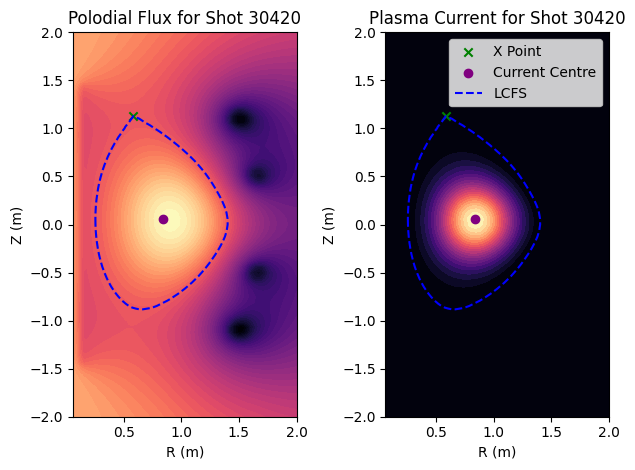

In [44]:
time_index = 50

plasma_current = dataset['plasma_current_rz'].dropna(dim='time')
plasma_current = plasma_current.isel(time=time_index)

polodial_flux_rz = dataset['psirz']
polodial_flux_rz = polodial_flux_rz.dropna(dim='profile_r')
polodial_flux_rz = polodial_flux_rz.isel(time=time_index)

lcfs_R = dataset['lcfs_r'].isel(time=time_index)
lcfs_Z = dataset['lcfs_z'].isel(time=time_index)

# Get the R and Z coordinates of the profiles.
r = dataset['r']
z = dataset['z']
R, Z = np.meshgrid(r, z)

# Get the x-point
xpoint_r = dataset['xpoint2_rc'][time_index]
xpoint_z = dataset['xpoint2_zc'][time_index]

# Get the current centre
mag_axis_r = dataset['current_centrd_r'][time_index]
mag_axis_z = dataset['current_centrd_z'][time_index]


# Get the last closed flux surface (LCFS)
lcfs_r = lcfs_R.values
lcfs_r = lcfs_r[~np.isnan(lcfs_r)]
lcfs_z = lcfs_Z.values
lcfs_z = lcfs_z[~np.isnan(lcfs_z)]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.contourf(R, Z, polodial_flux_rz, cmap='magma', levels=50, label='Polodial Flux')
ax1.scatter(xpoint_r, xpoint_z, marker='x', color='green', label='X Point')
ax1.scatter(mag_axis_r, mag_axis_z, marker='o', color='purple', label='Current Centre')
ax1.plot(lcfs_r, lcfs_z, c='blue', linestyle='--', label='LCFS')
ax1.set_title(f'Polodial Flux for Shot {polodial_flux_rz.attrs["shot_id"]}')
ax1.set_ylabel('Z (m)')
ax1.set_xlabel('R (m)')

ax2.contourf(R, Z, plasma_current, cmap='magma', levels=20, label='Plasma Current')
ax2.scatter(xpoint_r, xpoint_z, marker='x', color='green', label='X Point')
ax2.scatter(mag_axis_r, mag_axis_z, marker='o', color='purple', label='Current Centre')
ax2.plot(lcfs_r, lcfs_z, c='blue', linestyle='--', label='LCFS')
ax2.set_title(f'Plasma Current for Shot {plasma_current.attrs["shot_id"]}')
plt.ylabel('Z (m)')
plt.xlabel('R (m)')
plt.legend()
plt.tight_layout()